# Riming with w and saturation

Here only the polar night data is shown 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import xarray as xr

## 1. Data

In [2]:
fig_path='../figures/'

# subset of processes which should be used later on:
fr_proc_list_sel = ["deposition_fr", "sublimation_fr", "fr_eva_fr", "melt_fr", "rime_fr", "r_freeze_fr" , "homhet_fr", "wbf"]
fr_proc_names_sel = ["Deposition", "Sublimation", "Evap. freezing", "Melting", "Riming", "Rain freezing", "Hom/Het nucl.", "WBF" ]

li_proc_list_sel = ['evaporation_li','condensation_li', 'ccn_act_li'] # 'rime_li', 'r_freeze_li', 'melt_li', ]
li_proc_names_sel = ['Evaporation','Condensation', 'CCN Activation']  #'Riming', 'Rain Freezing', 'Melting', 

proc_names_sel = fr_proc_names_sel + li_proc_names_sel
proc_list_sel = fr_proc_list_sel + li_proc_list_sel


In [3]:
data_path = '/data/'

ds_pn_pd_all = xr.open_dataset(data_path+'processed/nc_files_revisions/df_all_tends_all_pn_and_pd_v2.nc')

In [4]:
ds_pn = ds_pn_pd_all.sel(time=ds_pn_pd_all.time.dt.month.isin([11, 12, 1, 2]))
ds_pd = ds_pn_pd_all.sel(time=ds_pn_pd_all.time.dt.month.isin([5, 6, 7, 8,]))

In [5]:
# conversion to pandas dataframe to fit with previous code
df_all_tends = ds_pn_pd_all[proc_list_sel].to_dataframe()
df_all_tends['W'] = ds_pn_pd_all['W'].to_dataframe()

df_all_tends_pn = ds_pn[proc_list_sel].to_dataframe()
df_all_tends_pn['W'] = ds_pn['W'].to_dataframe()

df_all_tends_pd = ds_pd[proc_list_sel].to_dataframe()
df_all_tends_pd['W'] = ds_pd['W'].to_dataframe()

In [6]:
df_all_tends.iloc[:, 0:11] = df_all_tends.iloc[:, 0:11].mask(df_all_tends.iloc[:, 0:11] < 1e-18)


In [7]:

df_all_tends_pn.iloc[:, 0:11] = df_all_tends_pn.iloc[:, 0:11].mask(df_all_tends_pn.iloc[:, 0:11] < 1e-18)


In [8]:
df_all_tends_pd.iloc[:, 0:11] = df_all_tends_pd.iloc[:, 0:11].mask(df_all_tends_pd.iloc[:, 0:11] < 1e-18)

In [9]:
# compute sum for all processes in fr_proc_list_sel for each row and add to dataframe
df_all_tends['total_fr'] = df_all_tends[fr_proc_list_sel].sum(axis=1)
df_all_tends['total_li'] = df_all_tends[li_proc_list_sel].sum(axis=1) 

df_all_tends_pd['total_fr'] = df_all_tends_pd[fr_proc_list_sel].sum(axis=1)
df_all_tends_pd['total_li'] = df_all_tends_pd[li_proc_list_sel].sum(axis=1)

df_all_tends_pn['total_fr'] = df_all_tends_pn[fr_proc_list_sel].sum(axis=1)
df_all_tends_pn['total_li'] = df_all_tends_pn[li_proc_list_sel].sum(axis=1)


In [10]:
df_all_tends_perc = df_all_tends[fr_proc_list_sel].div(df_all_tends['total_fr'], axis=0)*100
df_all_tends_perc[li_proc_list_sel] = df_all_tends[li_proc_list_sel].div(df_all_tends['total_li'], axis=0)*100

df_all_tends_perc_pn = df_all_tends_pn[fr_proc_list_sel].div(df_all_tends_pn['total_fr'], axis=0)*100
df_all_tends_perc_pn[li_proc_list_sel] = df_all_tends_pn[li_proc_list_sel].div(df_all_tends_pn['total_li'], axis=0)*100

df_all_tends_perc_pd = df_all_tends_pd[fr_proc_list_sel].div(df_all_tends_pd['total_fr'], axis=0)*100
df_all_tends_perc_pd[li_proc_list_sel] = df_all_tends_pd[li_proc_list_sel].div(df_all_tends_pd['total_li'], axis=0)*100

In [11]:
df_all_tends_perc['W'] = df_all_tends['W']
df_all_tends_perc_pn['W'] = df_all_tends_pn['W']
df_all_tends_perc_pd['W'] = df_all_tends_pd['W']

## 2. Plots

### 2.1 Wind binning

The distribution is quite similar for different binning sizes (0.1-0.4) at 0.5 the deposition shows a clearer increase with upwards velocity.

In [20]:
w_bins = np.arange(-3, 3, 0.2)
# xticks
w_bins_labels =np.arange(-2.9, 3, 0.2)

print(w_bins_labels)

df_all_tends_perc['W_bins'] = pd.cut(df_all_tends_perc['W'], bins=w_bins)
df_all_tends_perc_pd['W_bins'] = pd.cut(df_all_tends_perc_pd['W'], bins=w_bins)
df_all_tends_perc_pn['W_bins'] = pd.cut(df_all_tends_perc_pn['W'], bins=w_bins)

[-2.9 -2.7 -2.5 -2.3 -2.1 -1.9 -1.7 -1.5 -1.3 -1.1 -0.9 -0.7 -0.5 -0.3
 -0.1  0.1  0.3  0.5  0.7  0.9  1.1  1.3  1.5  1.7  1.9  2.1  2.3  2.5
  2.7  2.9]


Settings for plot so that same color is used as in others etc.

In [23]:
color_map = sns.color_palette("husl", 6)[::-1]
color_dep = color_map[0]
color_sub = color_map[1]
color_wbf = color_map[2]

nrows=1
ncols=4
width = 0.2

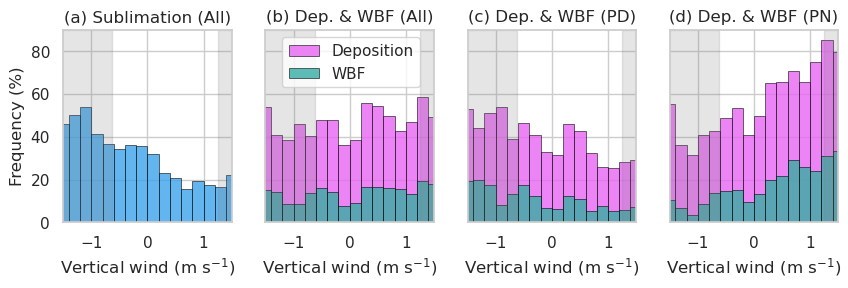

In [34]:
# create a figure with 4 subplots. They should be arranged in 2 rows and 2 columns
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,2.5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# plot with frequency of occurence
process = fr_proc_list_sel[1]
df_sub = df_all_tends_perc[df_all_tends_perc[process] > 1]
relative_occ = df_sub['W_bins'].value_counts().sort_index()/df_all_tends_perc['W_bins'].value_counts().sort_index()*100
axes[0].bar(w_bins[:-1],relative_occ, color=color_sub, width=width, align='edge',
             edgecolor='black', linewidth=0.5, alpha=0.8, label=process)

process = ["deposition_fr", "wbf"]
process_name = ['Deposition', 'WBF']
colors_processes = [color_dep, color_wbf]
for p, process in enumerate(process):
    df_sub = df_all_tends_perc[df_all_tends_perc[process] > 1]
    relative_occ = df_sub['W_bins'].value_counts().sort_index()/df_all_tends_perc['W_bins'].value_counts().sort_index()*100
    axes[1].bar(w_bins[:-1],relative_occ, color=colors_processes[p], width=width, align='edge', 
                        edgecolor='black', linewidth=0.5, alpha=0.8, label=process)

    df_sub_pd = df_all_tends_perc_pd[df_all_tends_perc_pd[process] > 1]
    relative_occ = df_sub_pd['W_bins'].value_counts().sort_index()/df_all_tends_perc_pd['W_bins'].value_counts().sort_index()*100
    axes[2].bar(w_bins[:-1],relative_occ, color=colors_processes[p], width=width, align='edge', 
                        edgecolor='black', linewidth=0.5, alpha=0.8, label=process_name[p])
    
    df_sub_pn = df_all_tends_perc_pn[df_all_tends_perc_pn[process] > 1]
    relative_occ = df_sub_pn['W_bins'].value_counts().sort_index()/df_all_tends_perc_pn['W_bins'].value_counts().sort_index()*100
    axes[3].bar(w_bins[:-1],relative_occ, color=colors_processes[p], width=width, align='edge', 
                        edgecolor='black', linewidth=0.5, alpha=0.8, label=process_name[p])

for i in range(4):
    axes[i].set_xlabel(r'Vertical wind (m s$^{-1}$)')
    axes[i].set_ylabel('')
    axes[i].set_ylim([0, 90])
    axes[i].set_xlim([-1.5, 1.5])

# don't set the ytick labels for the 2,3,4 subplot
axes[1].set_yticklabels([])
axes[2].set_yticklabels([])
axes[3].set_yticklabels([])

axes[0].set_ylabel('Frequency (%)')

axes[0].set_title('(a) Sublimation (All)')
axes[1].set_title('(b) Dep. & WBF (All)')
axes[2].set_title('(c) Dep. & WBF (PD)')
axes[3].set_title('(d) Dep. & WBF (PN)')

plt.legend(loc='upper right', bbox_to_anchor=(-1.44, 1))

# compute the lowest and highest 5% of the wind distribution
w_low = df_all_tends_perc['W'].quantile(0.01)
w_high = df_all_tends_perc['W'].quantile(0.99)

# mark the areas where the lowest 5% of the wind distribution is located and the highest 5% of the wind distribution
for i in range(4):
    axes[i].axvspan(-3, w_low, alpha=0.2, color='grey')
    axes[i].axvspan(w_high, 3, alpha=0.2, color='grey')

#plt.savefig(fig_path + 'fig05_depsub_wbf_w.png', dpi=300, bbox_inches='tight', format='png')
plt.savefig(fig_path + 'fig07_depsub_wbf_w.pdf', bbox_inches='tight', format='pdf')

plt.show()


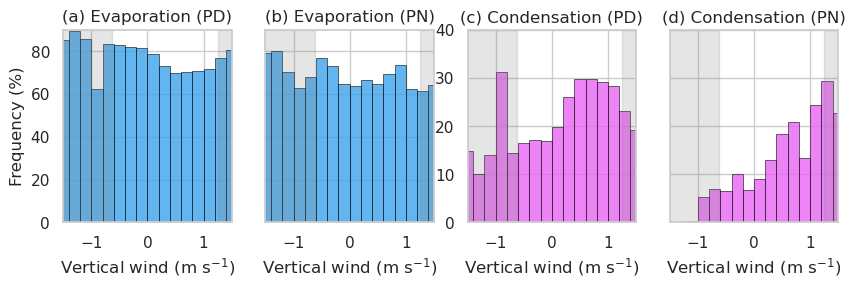

In [39]:
# create a figure with 4 subplots. They should be arranged in 2 rows and 2 columns
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10,2.5))
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# plot with frequency of occurence
processes = ['evaporation_li', 'condensation_li']
process_name = ['Evaporation', 'Condensation']
colors_processes = [color_sub, color_dep]

for p, process in enumerate(processes):
    i = 2*p
    df_sub = df_all_tends_perc[df_all_tends_perc[process] > 1]

    df_sub_pd = df_all_tends_perc_pd[df_all_tends_perc_pd[process] > 1]
    relative_occ = df_sub_pd['W_bins'].value_counts().sort_index()/df_all_tends_perc_pd['W_bins'].value_counts().sort_index()*100
    axes[i].bar(w_bins[:-1],relative_occ, color=colors_processes[p], width=width, align='edge', 
                            edgecolor='black', linewidth=0.5, alpha=0.8, label=process_name[p])
        
    df_sub_pn = df_all_tends_perc_pn[df_all_tends_perc_pn[process] > 1]
    relative_occ = df_sub_pn['W_bins'].value_counts().sort_index()/df_all_tends_perc_pn['W_bins'].value_counts().sort_index()*100
    axes[i+1].bar(w_bins[:-1],relative_occ, color=colors_processes[p], width=width, align='edge', 
                            edgecolor='black', linewidth=0.5, alpha=0.8, label=process_name[p])

for i in range(4):
    axes[i].set_xlabel(r'Vertical wind (m s$^{-1}$)')
    axes[i].set_ylabel('')
    axes[i].set_ylim([0, 90])
    axes[i].set_xlim([-1.5, 1.5])


axes[2].set_ylim([0, 40])
axes[3].set_ylim([0, 40])

# don't set the ytick labels for the 2,3,4 subplot
axes[1].set_yticklabels([])
#axes[2].set_yticklabels([])
axes[3].set_yticklabels([])

axes[0].set_ylabel('Frequency (%)')

axes[0].set_title('(a) Evaporation (PD)')
axes[1].set_title('(b) Evaporation (PN)')
axes[2].set_title('(c) Condensation (PD)')
axes[3].set_title('(d) Condensation (PN)')

# compute the lowest and highest 5% of the wind distribution
w_low = df_all_tends_perc['W'].quantile(0.01)
w_high = df_all_tends_perc['W'].quantile(0.99)

# mark the areas where the lowest 5% of the wind distribution is located and the highest 5% of the wind distribution
for i in range(4):
    axes[i].axvspan(-3, w_low, alpha=0.2, color='grey')
    axes[i].axvspan(w_high, 3, alpha=0.2, color='grey')

#plt.savefig(fig_path + 'fig05_depsub_wbf_w.png', dpi=300, bbox_inches='tight', format='png')
plt.savefig(fig_path + 'app_evap_cond_w.pdf', bbox_inches='tight', format='pdf')

plt.show()
